In [62]:
#montecarlo simulation für Einwanderungen in die Schweiz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as ticker
from fitter import Fitter



In [97]:
#import xlsx file
df = pd.read_excel('../Rohdaten/auswanderung.xlsx',sheet_name='su-d-01.05.09.01')

#transpose dataframe
df = df.T
#delete all columns except Jahr and Total
df = df.drop(df.columns[1:], axis=1)
#reset index
df = df.reset_index()
#set first row as as column names
df.columns = df.iloc[0]
#delete first row
df = df.drop(df.index[0])

In [101]:
df

,Jahr,Total,Delta
1,1993,504177,NaN
2,1994,514883,10706
3,1995,527795,12912
4,1996,541302,13507
5,1997,552293,10991
6,1998,562813,10520
7,1999,572957,10144
8,2000,580396,7439
9,2001,591660,11264
10,2002,598934,7274


In [99]:
#calculate delta between years
df['Delta'] = df['Total'] - df['Total'].shift(1)
#delete first row


,sumsquare_error,aic,bic,kl_div
alpha,inf,inf,inf,inf
anglit,inf,inf,inf,inf
arcsine,inf,inf,inf,inf
beta,inf,inf,inf,inf
argus,inf,inf,inf,inf


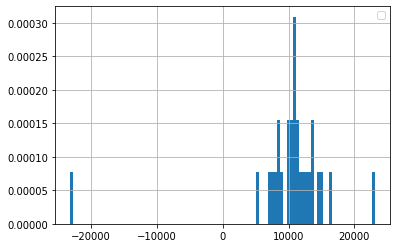

In [109]:
f = Fitter(df['Delta'].values)
f.distributions = f.distributions[0:10] + ['gamma']
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()